In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rand
import math
import scipy.special as spec
from scipy.spatial import Delaunay
import statistics as stats
from tqdm import tqdm

In [2]:
#define parameters
#the lattice has is of dimentions dim*a x dim*b
a = 1             #primitive cell lenght
b = np.sqrt(3/4)  #primitive cell height
T = 15000         #a shorter time allows for a more reasonable simulation time
dim = 20
#N = dim**2
dt = 10**(-1)
q = 0.01
global pos

## Set up the points simulated

In [3]:
A0 = np.arange(-a,(dim+1)*a, dtype = float)
B0 = np.arange(-b,(dim+1)*b, dtype = float)
A = A0[1:-1]
B = B0[1:-1]

N = len(A)*len(B) 
pos = np.empty((T+1,2,len(A)*len(B)))
pos[0][0] = np.tile(A,len(B))
pos[0][1] = np.repeat(B,len(A))

In [4]:
pt_addx = np.array(np.repeat(A0[0],len(B)+1), dtype = float)
pt_addx = np.concatenate((pt_addx, np.zeros(len(B)+1) + A0[-1], A, A + 0.5))
pt_addy = np.array(np.repeat(B0[0],len(A)), dtype = float)
pt_addy = np.concatenate((B0[1:], B0[0:-1], pt_addy, np.zeros(len(A)) + B0[-1]))

#Code to disloge a square lattince in a triangle one
for i in range(len(B)):
    #print((i+1) % 2)
    if i % 2 == 0:
        pt_addx[i] += a/2
        pt_addx[2*len(B)-i] += a/2
        for j in range(i * len(A), (i+1)*len(A)):
            #print(j,img_x[j])
            pos[0][0][j] += a/2
#pt_addx[len(B)+1] -= a/2
pt_addx[len(B)] += a/2
pt_add = np.transpose([pt_addx,pt_addy])

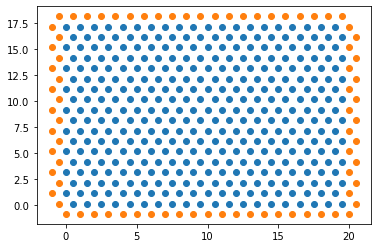

In [5]:
#initial setup plotted
fig, ax = plt.subplots()

# plt.plot(img_x, img_y,'o')
plt.plot(pos[0][0], pos[0][1],'o')
plt.plot(pt_add[:,0],pt_add[:,1],'o')

#for i in range(len(A)):
#    plt.annotate(i, (pt_addx[-i],pt_addy[-i]))
#plt.xlim(0, dim*a)
#plt.ylim(0, dim*b)
plt.show()

Force relationship in Gartlan eq.(3.18), pg44

# Test the Delaunay triangulation method of finding nearest neighbours

In [6]:
t = 0

In [7]:
#x,y,z = np.shape(pos)
points = np.random.rand(4,2)*5

In [8]:
points = np.array(np.transpose([pos[t][0], pos[t][1]]))
points = np.concatenate((points,pt_add))
tri = Delaunay(points)
inx_marks, indices = tri.vertex_neighbor_vertices
neighbours_of_vortex = [indices[inx_marks[vortex]:inx_marks[vortex+1]] for vortex in range(N)]
#neighbours_of_vortex[0]

In [9]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [10]:
Vor = Voronoi(points)

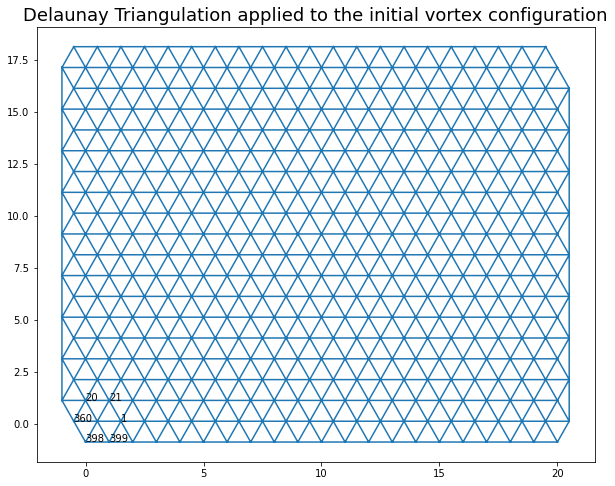

In [11]:
vortex = 0
#fig = voronoi_plot_2d(Vor, show_vertices=False, point_size = 12, label='Voronoi diagram')
fig = plt.figure(figsize=[10,8])

plt.triplot(points[:,0], points[:,1], tri.simplices, label='Delaunay triangulation')
#plt.scatter(points[:,0],points[:,1],color = 'k', label='Data points')
#plt.plot(pos[t][0], pos[t][1], 'o')
#plt.plot(pt_add[:,0], pt_add[:,1], 'o')
#plt.plot(points[Delaunay.find_simplex(tri, points[neighbours_of_vortex[vortex][:2]])], 'ko')

for i in neighbours_of_vortex[vortex]:
    plt.annotate(i, (points[i,0],points[i,1]))
for j, s in enumerate(tri.simplices[0:6]):
    p = points[s].mean(axis=0)
    #plt.text(p[0], p[1], '%d' % j, ha='center') # label triangles

plt.title('Delaunay Triangulation applied to the initial vortex configuration',fontsize = 18 )
#plt.xlim(-1.5*a, 5*a)
#plt.ylim(-1.5*b, 5*b)
#plt.legend(bbox_to_anchor=(1.01,1), loc="upper right",fontsize=12)
plt.show()

fig = plt.figure()
plt.triplot(points[:,0], points[:,1], tri.simplices, label='Delaunay triangulation')
plt.scatter(points[:,0],points[:,1],color = 'k', label='Data points')
plt.title('Delaunay Triangulation applied to the initial vortex configuration',fontsize=font+2)
#plt.xlabel( " Component ",fontsize=font+2 )
#plt.ylabel( " Explained variance ",fontsize=font+2 )
sub_axes = plt.axes([1, .35, .35, .45]) 
# plot the zoomed portion
sub_axes.scatter(points[:,0],points[:,1])
sub_axes.triplot(points[:,0], points[:,1], tri.simplices, label='Delaunay triangulation')
#sub_axes.xlim(-1.5*a, 5*a)
#sub_axes.ylim(1.5*b, 5*b)
#from mpl_toolkits.axes_grid1.inset_locator import mark_inset
#from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
#axins = zoomed_inset_axes(ax, 6, loc=1)
#axins.set_xlim(1, 31)
#axins.set_ylim(0, 0.4)
#mark_inset(sub_axes, axins, loc1=2, loc2=0, fc="none", ec="0.5")

#plt.xticks(np.arange (1 , len ( S ) +1, 50))
plt.title("The first 30 components",fontsize=font)
#plt.xlabel( " Component ",fontsize=font )
#plt.ylabel( " Explained variance ",fontsize=font )
plt.savefig('scree_plot_total_30.png')
plt.show()

### Find angles, in radians

In [12]:
neighbours = len(neighbours_of_vortex[vortex])

In [13]:
np.degrees(np.arccos((2*b**2-0.5)/(2*b**2+0.5)))     # analytic result

60.00000000000001

In [14]:
#I can cycle through simplexes by finding all the ones that have the curent vortex (1), find the neighbors of each one (2),
#use the neighbours to cycle by checking the move is done on a simplex that appears in the list at (1) and is not the previour simplex

simplex = np.where(tri.simplices == vortex)[0] #1 list triangles
nt = tri.neighbors[simplex] #2 list neighbors of each triangle

ind = 0
angles = []
triangle = simplex[ind]                    #choose first on in list simplex
past = -1
for i in range(neighbours):
    triangle_points_ind = tri.simplices[triangle]
    point_pair = points[np.delete(triangle_points_ind,np.where(triangle_points_ind == vortex))] #the two points besides the vortex in the simplex
    #print(np.delete(triangle_points_ind,np.where(triangle_points_ind == vortex)))
    #pasted (a,b,c are coordonates)
    ba = point_pair[0] - points[vortex]
    bc = point_pair[1] - points[vortex]

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angles.append(np.arccos(cosine_angle))
    #pasted
    #a = point_pair[0]
    #b = points[vortex]
    #c = point_pair[1]
    #angles.append(math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0])))
    for idx, val in np.ndenumerate(nt[ind]):
        #print(triangle,val)
        if val != past and val != -1 and val in simplex:
            past = triangle
            triangle = val
            ind = np.where(simplex == val)
            #print(val)
            break

np.degrees(angles)
#angles

array([63.43494882, 53.13010235, 63.43494882, 63.43494882, 53.13010235,
       63.43494882])

### Calculate parameter

In [15]:
print(np.mean(np.exp(np.multiply(6j,angles))))
#nn_s = abs(np.sum(np.exp(complex(0,1)*6*angles))/neighbours)
nn_m = np.mean(np.exp(np.multiply(6j,angles)))

(0.874730666666667+0.015018666666666625j)


# Simulation

In order to get the needed results the simulation runs 15000 time steps as defined by variable T. This takes aproximately 1h 30min. To avoid runing it every time I saved the needed data from the last run. The X and Y coordinates of every point can be found in dataX_used_report.csv and dataY_used_report.csv, respectively. The order parameter is stored in data_order.csv, while data_order_parameter.csv stores the values of the order parameter averaged for every temperature.

The simulation can be run for a decresed time (1000 time steps take around 3 minutes), but that means that the data analysis following it will break down due to having less data points than expected.

In [16]:
temp_range = np.arange(0,0.25,0.025)
temp = np.repeat(temp_range, T/len(temp_range))
step = int(T/len(temp_range))
print(step) # must be 1500
temp_range

1500


array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225])

Set bellow cell to code to run simulation.

d =[[],[]]

order = np.empty(T)
order_parameter = np.empty(len(temp_range))
index = 0
order_index = 0
#for temp_ind in range(len(temp)):
for t in tqdm(range(T)):
    angles_neighbours = np.empty(N)
    points = np.array(np.transpose([pos[t][0], pos[t][1]]))
    points = np.concatenate((points,pt_add))
    tri = Delaunay(points)
    inx_marks, indices = tri.vertex_neighbor_vertices
    neighbours_of_vortex = [indices[inx_marks[vortex]:inx_marks[vortex+1]] for vortex in range(N)]

    for vortex in range(N):
        neighbours = len(neighbours_of_vortex[vortex])
        simplex = np.where(tri.simplices == vortex)[0] #1 list triangles
        #print('simplex', simplex)
        nt = tri.neighbors[simplex]                    #2 list neighbors of each triangle

        ind = 0
        angles = np.empty(neighbours)
        triangle = simplex[ind]                    #choose first in list simplex
        past = -1
        for i in range(neighbours):
            triangle_points_ind = tri.simplices[triangle]
            point_pair = points[np.delete(triangle_points_ind,np.where(triangle_points_ind == vortex))] #the two points besides the vortex in the simplex
            #print(point_pair, 'pnt0',point_pair[0],'pnt1',point_pair[1])

            ba = point_pair[0] - points[vortex]
            bc = point_pair[1] - points[vortex]

            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            #angles.append(np.arccos(cosine_angle))
            angles[i] = np.arccos(cosine_angle)

            #print(np.isin(nt[ind], simplex))
            m = np.multiply(nt[ind]!= past, np.isin(nt[ind], simplex))
            past = triangle
            #print('next triangle', nt[ind],'mask',m)
            triangle = nt[ind][m][0]
            #print('triangle',triangle)
            #if np.shape(triangle)[0] > 1:
            #    triangle = triangle[0]
            ind = np.nonzero(triangle == simplex)[0][0]
            '''
            for idx, val in np.ndenumerate(nt[ind]):
                #print(triangle,val)
                if val != past and val != -1 and val in simplex:
                    past = triangle
                    triangle = val
                    ind = np.where(simplex == val)
                    #print(val)
                    break
            '''
        angles_neighbours[vortex] = np.mean(np.exp(np.multiply(6j,angles)))

    order[t] = np.mean(np.abs(angles_neighbours))
    #order_index += 1
    angles_neighbours = np.empty(N)
    
    if t % step == step - 1:
        order_parameter[index] = abs(np.mean(order[index*step:(index+1)*step]))
        #print(order_parameter)
        index += 1
        #order = np.empty(step)
        #order_index = 0

        
    dx0 = np.array([pos[t][0][i] - pos[t][0] for i in range(N)])
    dy0 = np.array([pos[t][1][i] - pos[t][1] for i in range(N)])
    #print(dx0 - np.sign(dx0)*dim*a)
    dx0 = np.where(np.abs(dx0) > dim*a/2, dx0 - np.sign(dx0)*dim*a, dx0)  #wrap araund edge
    dy0 = np.where(np.abs(dy0) > dim*b/2, dy0 - np.sign(dy0)*dim*b, dy0)
    dx = np.array([np.delete(dx0[i], i) for i in range(N)])
    dy = np.array([np.delete(dy0[i], i) for i in range(N)])
    mag = np.sqrt(dx**2 + dy**2)
    d[0] = np.divide(dx, mag)       #proportion of force in the x direction
    d[1] = np.divide(dy, mag)       #proportion of force in the y direction
    inter_x = np.array([np.mean(d[0][i]*spec.kn(1,mag[i])) for i in range(N)])
    inter_y = np.array([np.mean(d[1][i]*spec.kn(1,mag[i])) for i in range(N)])
    u = rand.uniform(0, 1, N)
    m = u < q
    mask = np.transpose([m,m])
    gauss = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0],[0, 1]]))
    thermo = np.where(mask, np.sqrt(temp[t])*gauss, np.zeros(2))
    #thermo = np.where(mask, temp[temp_ind]*gauss, np.zeros(2))
    thermo = np.transpose(thermo)
    force_x = thermo[0] + inter_x
    force_y = thermo[1] + inter_y
    pos[t+1][0] = (pos[t][0] +  force_x*dt ) % (dim*a)
    pos[t+1][1] = (pos[t][1] +  force_y*dt ) % (dim*b)
plt.plot(pos[T-1][0], pos[T-1][1],'o')
plt.xlim(0, dim*a)
plt.ylim(0, dim*b)
plt.show()

np.savetxt("D:\Project\dataX_used_report.csv", pos[:,0])
np.savetxt("D:\Project\dataY_used_report.csv", pos[:,1])
np.savetxt("D:\Project\data_order.csv", order)
np.savetxt("D:\Project\data_order_parameter.csv", order_parameter)

In [17]:
#Load data from previous simulation
pos[:,0] = np.loadtxt("dataX_used_report.csv")
pos[:,1] = np.loadtxt("dataY_used_report.csv")
order = np.loadtxt("data_order.csv")
order_parameter = np.loadtxt("data_order_parameter.csv")

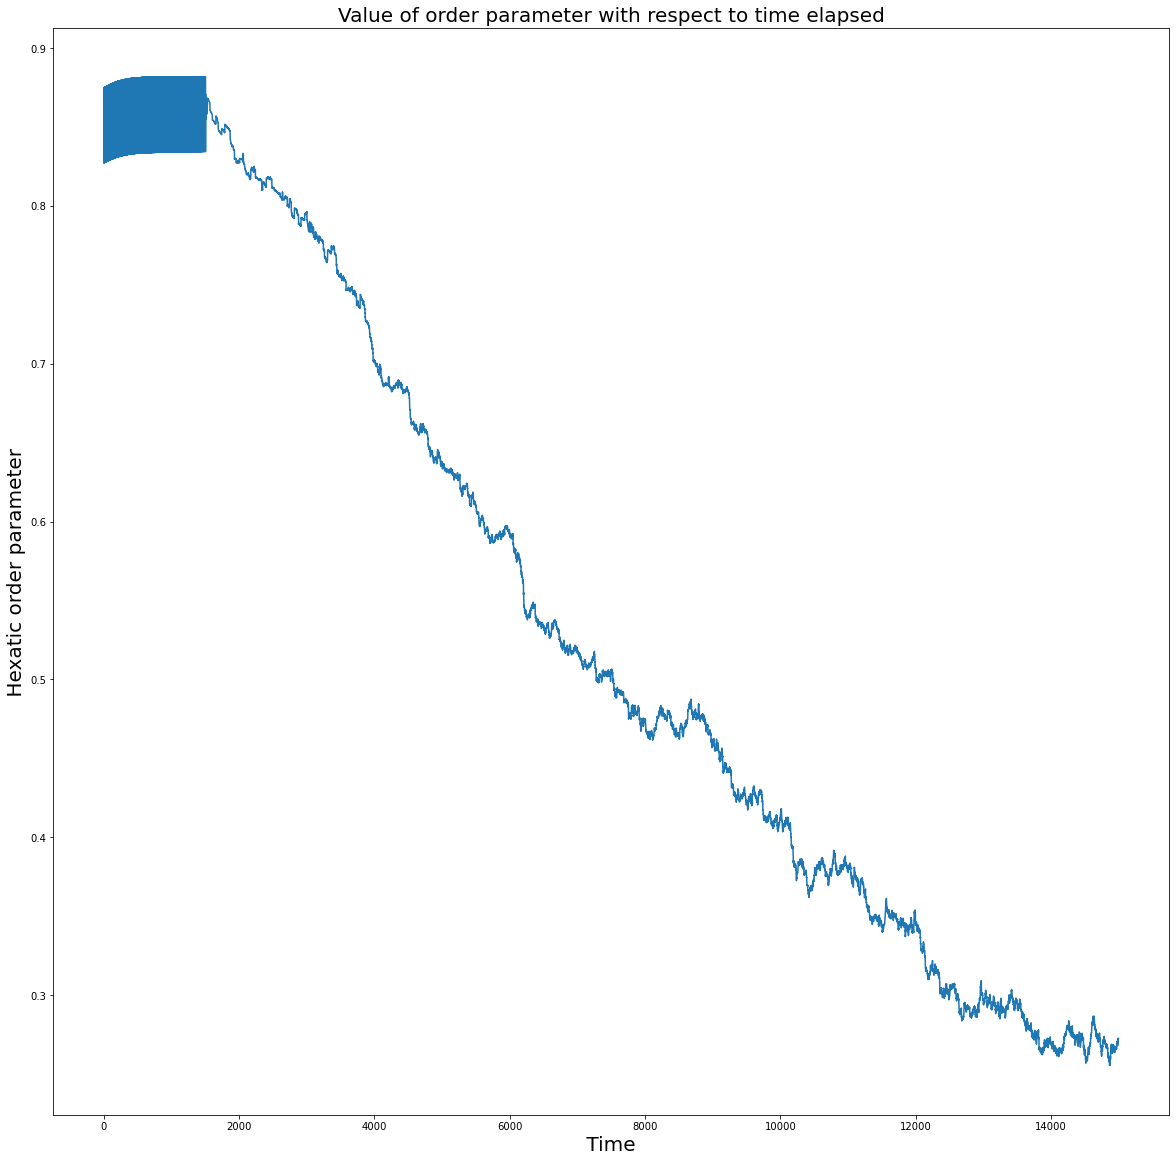

In [18]:
fig = plt.figure(figsize=[20,20])
plt.plot(range(T), order)
#plt.plot(np.arange(T,step = 2), order_parameter)
plt.title("Value of order parameter with respect to time elapsed", fontsize = 20)
plt.xlabel( " Time ", fontsize = 20)
plt.ylabel( " Hexatic order parameter ", fontsize = 20)
#plt.savefig('temp_order_param.png')
plt.show()

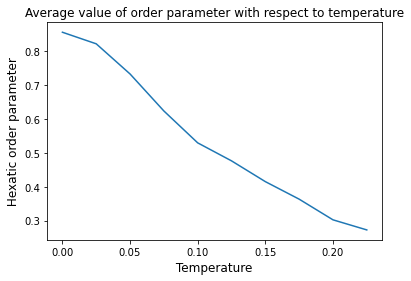

In [19]:
font = 12
fig = plt.figure()
plt.plot(temp_range, order_parameter)
plt.title("Average value of order parameter with respect to temperature",fontsize=font)
plt.xlabel( " Temperature ",fontsize=font )
plt.ylabel( " Hexatic order parameter ",fontsize=font )

#plt.savefig('temp_order_param.png')
plt.show()

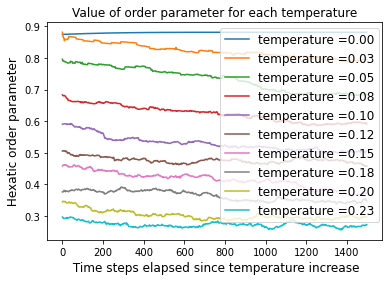

In [20]:
fig = plt.figure()
for index in range(len(temp_range)):
    temp = temp_range[index]
    plt.plot(np.arange(step,step = 2), order[index*step:(index+1)*step:2], label='temperature ={0:.2f}'.format(temp) )

plt.xlabel( " Time steps elapsed since temperature increase",fontsize=font)
plt.ylabel( " Hexatic order parameter " ,fontsize=font)
plt.title("Value of order parameter for each temperature",fontsize=font)
plt.legend(bbox_to_anchor=(1.01,1), loc="upper right",fontsize=12)
#plt.savefig('time_order_param.png')
plt.show()

# make X 

In [21]:
Total_data = [np.concatenate((pos[t][0],pos[t][1])) for t in np.arange(0,T)]
Total_data = np.transpose(Total_data)
X_solid = [np.concatenate((pos[t][0],pos[t][1])) for t in np.arange(50, 2550, 50)]
X_solid = np.transpose(X_solid)
X_melt = [np.concatenate((pos[t][0],pos[t][1]))for t in np.arange(12500, T, 50)]
X_melt = np.transpose(X_melt)
#order_solid = [order[t] for t in np.arange(50, 2550, 50)]
#order_melt = [order[t] for t in np.arange(12500, T, 50)]
#np.savetxt("D:\Project\data_order_melt.csv", order_melt)
#col = [np.concatenate((pos[t][0],pos[t][1]))for t in np.arange(100, 1500, 100)]

print(np.shape(X_solid), np.shape(X_melt))

(720, 50) (720, 50)


np.savetxt("D:\Project\Total_data.csv", Total_data)
np.savetxt("D:\Project\data_X_solid.csv", X_solid)
np.savetxt("D:\Project\data_X_melt.csv", X_melt)
np.savetxt("D:\Project\data_order.csv", order)

Total_data = np.loadtxt("D:\Project\Total_data.csv")
X_solid = np.loadtxt("D:\Project\data_X_solid.csv")
X_melt = np.loadtxt("D:\Project\data_X_melt.csv")
order = np.loadtxt("D:\Project\data_order.csv")

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

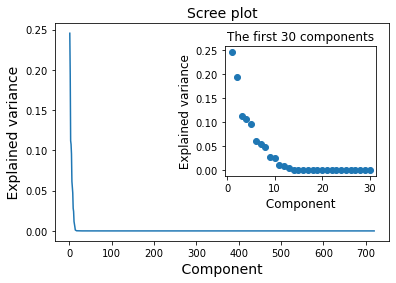

In [23]:
#The many quantities commented out in this cell are values that I used in the investigation stage, but ended up being irrelevant
sigma_total = np.cov(Total_data, ddof = 1)
sigma_solid = np.cov(X_solid, ddof = 1)
sigma_melt = np.cov(X_melt, ddof = 1)
sigma = np.cov(Total_data)
sigma = np.cov(np.concatenate([X_solid, X_melt]))

X = np.concatenate([X_solid, X_melt])
#labels = np.concatenate([order_solid, order_melt])

U, S, V = np.linalg.svd(sigma)
Us, Ss, Vs = np.linalg.svd(sigma_solid)
Um, Sm, Vm = np.linalg.svd(sigma_melt)

Ut, St, Vt = np.linalg.svd(sigma_total)
#Ut = np.loadtxt("D:\Project\Old data base.csv")
#St = np.loadtxt("D:\Project\Old St data base.csv")

# scree plot
exVar = np . power (St ,1) / np . sum ( np . power (St ,1) )
#print ( [exVar[i] for i in range(3)] )   #print the values of the first 3 components

fig = plt.figure()
plt.plot(np.arange (1 , len(exVar)+1) ,exVar)
plt.title("Scree plot",fontsize=font+2)
plt.xlabel( " Component ",fontsize=font+2 )
plt.ylabel( " Explained variance ",fontsize=font+2 )
sub_axes = plt.axes([.52, .35, .35, .45]) 
# plot the zoomed portion
sub_axes.scatter(np.arange (1 , 31), exVar[0:30]) 

#plt.xticks(np.arange (1 , len ( S ) +1, 50))
plt.title("The first 30 components",fontsize=font)
plt.xlabel( " Component ",fontsize=font )
plt.ylabel( " Explained variance ",fontsize=font )
plt.savefig('scree_plot_total_30.png')
plt.show()

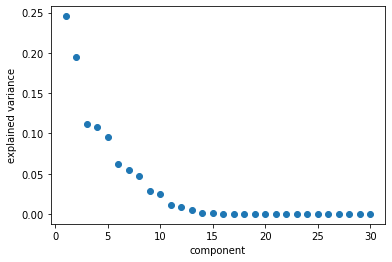

In [24]:
exVar = np.power(St,1) / np.sum(np.power(St,1))

plt.scatter(np.arange (1 , 31) ,exVar[0:30])
plt.xlabel("component")
plt.ylabel("explained variance")
#plt.savefig('scree_plot_melt.png')
plt.show()

np.savetxt("D:\Project\Old data base.csv", Ut)
np.savetxt("D:\Project\Old St data base.csv", St)

Ut = np.loadtxt("D:\Project\Old data base.csv")
St = np.loadtxt("D:\Project\Old St data base.csv")

In [25]:
cut_off = 70

Xp20_total = np.array([Ut[i,:].T@Total_data for i in range(cut_off)]).T

Xp20 = np.array([U[i,:].T@X for i in range(cut_off)])
Xp20_solid = np.array([Us[i,:].T@X_solid for i in range(cut_off)]).T
Xp20_melt = np.array([Um[i,:].T@X_melt for i in range(cut_off)]).T

#np.savetxt("D:\Project\Xp20_total.csv", Xp20_total)
#np.savetxt("D:\Project\Xp20_solid.csv", Xp20_solid)
#np.savetxt("D:\Project\Xp20_melt.csv", Xp20_melt)

Xp20_total = np.loadtxt("D:\Project\Xp20_total.csv")
Xp20_solid = np.loadtxt("D:\Project\Xp20_solid.csv")
Xp20_melt = np.loadtxt("D:\Project\Xp20_melt.csv")

In [26]:
labels = np.concatenate([np.ones(50), np.zeros(50)])
Xp20 = np.concatenate([Xp20_total[50:2550:50], Xp20_total[12500:T:50]])

print(np.shape(Xp20_total), np.shape(Xp20), np.shape(labels))

(15000, 70) (100, 70) (100,)


In [27]:
rs = np.random.randint(100)
#rs = 87 #or 36 or 71 5 66 for good results
rs

28

In [28]:
X_train, X_test, labels_train, labels_test = train_test_split(Xp20, labels, test_size= 0.3, random_state=rs)
clr = LogisticRegression(random_state=rs, max_iter = 400)
clr.fit(X_train, labels_train)
score = clr.score(X_test, labels_test)
score

1.0

In [29]:
predictions = clr.predict(X_test)
cm = metrics.confusion_matrix(labels_test, predictions)
cm

array([[14,  0],
       [ 0, 16]], dtype=int64)

import pickle
filename = 'saved_model.sav'
pickle.dump(clr, open(filename, 'wb'))
loaded_model = pickle.load(open('saved_model.sav', 'rb'))

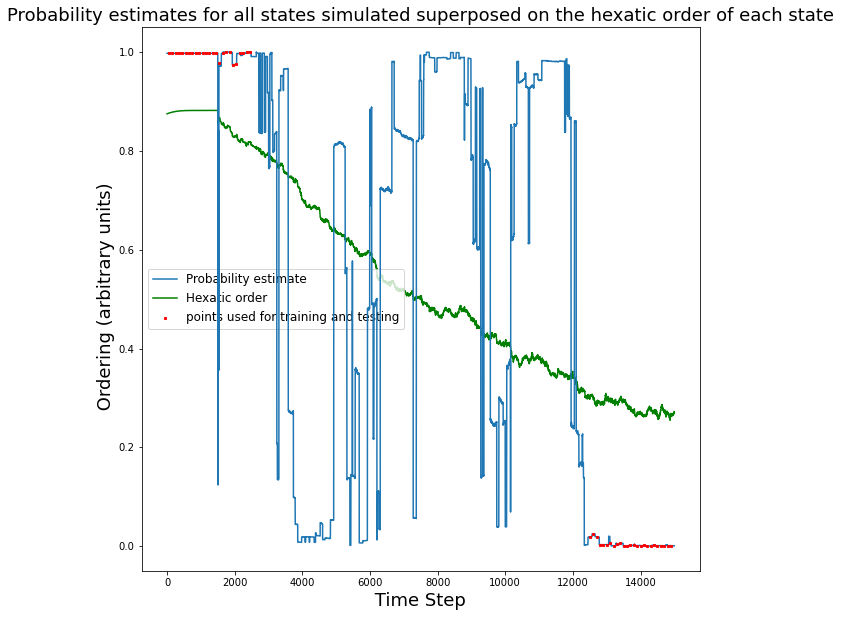

In [30]:
#f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = [20,10])
fig = plt.figure(figsize=[10,10])
predicted = np.transpose(clr.predict_proba(Xp20_total))[1]
plt.plot(np.arange (0 , T,2) ,predicted[::2],label = 'Probability estimate', zorder=10)
plt.plot(np.arange (0 , T,2) ,order[::2],'g-',label = 'Hexatic order', zorder=0)

fitted = np.concatenate((predicted[50:2550:100], predicted[12500:T:100]))
pnts = np.concatenate((np.arange(50,2550,100), np.arange(12500,T,100)))
#print(np.shape(pnts),np.shape(fitted))
plt.scatter(pnts, fitted, color = 'r', marker = 'X',s = 5, label = 'points used for training and testing', zorder=50)

plt.title('Probability estimates for all states simulated superposed on the hexatic order of each state',fontsize=18)
plt.xlabel( " Time Step ",fontsize=18 )
plt.ylabel( " Ordering (arbitrary units)",fontsize=18 )
plt.legend(fontsize=12)
'''
Xp20 = np.concatenate([Xp20_solid, Xp20_melt])
ax2.plot(np.arange (0 , len(Xp20)),np.transpose(clr.predict_proba(Xp20))[1])
ax2.set_title('Probability for the model to label a state with 1 in a data set that was split and then run through PCA')
#plt.xticks(np.arange (1 , len ( S ) +1, 50))
#plt.xlabel( " component " )
#plt.ylabel( " explained variance " )
'''
#plt.savefig('D:\Project\plot for crossover with sliced total data set 70 char.png')
plt.show()

## Small test for the model

In [31]:
A0 = np.arange(-a,(dim+1)*a, dtype = float)
B0 = np.arange(-b,(dim+1)*b, dtype = float)
A = A0[1:-1]
B = B0[1:-1]

N = len(A)*len(B)
test2 = np.empty((2,len(A)*len(B)))
test2[0] = np.tile(A,len(B))
test2[1] = np.repeat(B,len(A))
test_set = [np.concatenate((test2[0],test2[1]))]
test_set = np.transpose(test_set)
sigma_test = np.cov(Total_data, ddof = 1)
U_test, S_test, V_test = np.linalg.svd(sigma_test)

Xp_test2 = np.array([U_test[i,:].T@test_set for i in range(cut_off)]).T

test = np.random.rand(100, cut_off)
print('This is the randomly generated test data. It is expected to be mostly 0s \n' , clr.predict(test))
print('This is test data in a triangular lattice for one observation, expected to be 1 \n' , clr.predict(Xp_test2))
print(' This is the melted data \n', clr.predict(Xp20_melt))
print(' This is the solid data \n', clr.predict(Xp20_solid))
print(' This is the data used for training and testing, expected mixed  \n', clr.predict(Xp20))

This is the randomly generated test data. It is expected to be mostly 0s 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
This is test data in a triangular lattice for one observation, expected to be 1 
 [1.]
 This is the melted data 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
 This is the solid data 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
 This is the data used for training and testing, expected mixed  
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

## Train model with data split before PCA

In [32]:
Xp20 = np.concatenate([Xp20_solid, Xp20_melt])
X_train2, X_test2, labels_train2, labels_test2 = train_test_split(Xp20, labels, test_size= 0.3, random_state=rs)
clr2 = LogisticRegression(random_state=rs, max_iter = 400)
clr2.fit(X_train2, labels_train2)
score = clr2.score(X_test2, labels_test2)
score

1.0

In [33]:
predictions = clr2.predict_proba(Xp20)
predictions = np.transpose(predictions)[1]

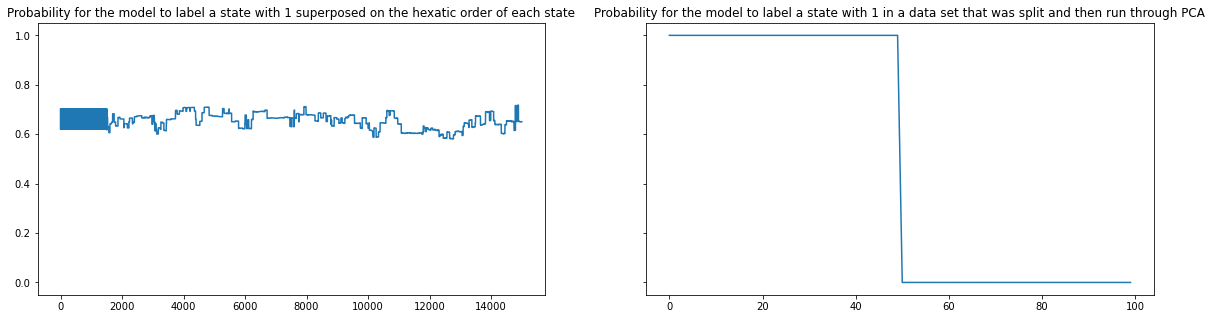

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = [20,5])
ax1.plot(np.arange (0 , T), np.transpose(clr2.predict_proba(Xp20_total))[1])
ax1.set_title('Probability for the model to label a state with 1 superposed on the hexatic order of each state')

ax2.set_title('Probability for the model to label a state with 1 in a data set that was split and then run through PCA')
ax2.plot(np.arange (0 , len(Xp20)), predictions)
plt.show()